<a href="https://colab.research.google.com/github/deshanchathusanka/optimisation/blob/main/optimizer_development.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. $\color{Blue}{\text{Installations}}$

In [71]:
import numpy as np
import doctest
import math
import time
import matplotlib.pyplot as plt

from scipy.stats import truncnorm

# 2. $\color{Blue}{\text{Function Definitions}}$

## 2.1 $\color{Blue}{\text{Function Counter Decorator}}$

In [72]:
def count(fn):
  '''
  This is a decorator function to count number of function executions
  fn : function
  '''
  def decorated_fn(*args, **kwargs):
    decorated_fn.execution += 1
    return fn(*args, **kwargs)
  decorated_fn.execution = 0
  return decorated_fn

## 2.2 $\color{Blue}{\text{Implementations of Equations}}$

### 2.2.1 $
\color{Red}{
f(x) = 1.10471 x1^2 x2 + 0.04811x3x4(14.0 + x2)
}
$

In [73]:
@count # f = count(f)
def f(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  f_x = 1.10471*x1*x1*x2 + 0.04811*x3*x4*(14.0 + x2)
  return f_x

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
f(x_np)
f(x_np)
print(f'Number of executions = {f.execution}')


########## Testing execution count ############

Number of executions = 2


### 2.2.2 ${\color{Blue}{
\tau' = \frac{6000}{\sqrt{2}x1x2}
}}$

In [74]:
@count # t1 = count(t1)
def t1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = 6000/(math.sqrt(2)*x1*x2)
  return _t1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t1(x_np)
t1(x_np)
print(f'Number of executions = {t1.execution}')

assert round(t1(x_np), 2) == 2121.32


########## Testing execution count ############

Number of executions = 2


### 2.2.3 $
\color{Blue}{
\tau'' = \frac{6000(14+0.5x_2)\sqrt{0.25(x_2^2+(x_1+x_3)^2)}}{2(0.707x_1x_2(\frac{x_2^2}{12}+0.25(x_1+x_3)^2))}
}
$

In [75]:
@count # t2 = count(t2)
def t2(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  numerator = 6000*(14+0.5*x2)*math.sqrt(0.25*(x2**2 + (x1+x3)**2))
  denominator = 2*(0.707*x1*x2*((x2**2/12) + 0.25*((x1+x3)**2))) 

  if denominator == 0 :
    raise RuntimeWarning("Error")

  _t2 = numerator/denominator
  return _t2

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t2(x_np)
t2(x_np)
t2(x_np)
print(f'Number of executions = {t2.execution}')

assert round(t2(x_np)) == 16422.00


########## Testing execution count ############

Number of executions = 3


### 2.2.4 $
\color{Blue}{
\tau = \sqrt{(\tau'^2+\tau''^2) + \frac{x_2\tau'\tau''}{\sqrt{0.25(x_2^2 + (x_1 + x_3)^2)}}}
}$

In [76]:
@count
def t(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _t1 = t1(x_np)
  _t2 = t2(x_np)
  _t = math.sqrt((_t1**2 + _t2**2) 
  + ((x2*_t1*_t2)/(0.25*(x2**2 + (x1 + x3)**2))))

  return _t

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
t(x_np)
t(x_np)
t(x_np)
print(f'Number of executions = {t.execution}')

_t = t(x_np)
assert round(_t, 2) == 16974.00, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.5 $\color{Blue}{
  \sigma = \frac{504000}{x_3^2x_4}
}$

In [77]:
@count
def sigma(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _sigma = 504000/((x3**2)*x4)

  return _sigma

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
sigma(x_np)
sigma(x_np)
sigma(x_np)
print(f'Number of executions = {sigma.execution}')

assert round(sigma(x_np)) == 14000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.6 $\color{Blue}{
  p = 64746.022(1 - 0.0282346x_3)x_3x_4^3
}$

In [78]:
@count
def p(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  [x1, x2, x3, x4] = x_np
  _p = 64746.022*(1 - 0.0282346*x3)*x3*(x4**3)

  return _p

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
p(x_np)
p(x_np)
p(x_np)
print(f'Number of executions = {p.execution}')

assert round(p(x_np), 2) == 11378263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


### 2.2.7 $\color{Red}{
  g_1(x) = 13600 - \tau(x)
}
$

In [79]:
@count
def g1(x_np):
  '''
  x_np = numpy array = [x1, x2, x3, x4]
  '''
  _t = t(x_np)
  _g1 = 13600 - _t

  return _g1

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g1(x_np)
g1(x_np)
g1(x_np)
print(f'Number of executions = {g1.execution}')

assert round(g1(x_np), 2) == -3374, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [80]:
@count
def g2(x_np):
  _sigma = sigma(x_np)
  _g2 = 30000 - _sigma

  return _g2


########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g2(x_np)
g2(x_np)
g2(x_np)
print(f'Number of executions = {g2.execution}')

assert round(g2(x_np), 2) == 16000, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [81]:
@count
def g3(x_np):
  [x1, x2, x3, x4] = x_np
  _g3 = x4 - x1
  return _g3

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g3(x_np)
g3(x_np)
g3(x_np)
print(f'Number of executions = {g3.execution}')

assert round(g3(x_np)) == 3, 'functional issue'


########## Testing execution count ############

Number of executions = 3


In [82]:
@count
def g4(x_np):
  _p = p(x_np)
  _g4 = _p - 6000

  return _g4

########### unit testing #############
print('\n########## Testing execution count ############\n')
x_np = np.array([1, 2, 3, 4])
g4(x_np)
g4(x_np)
g4(x_np)
print(f'Number of executions = {g4.execution}')

assert round(g4(x_np), 2) == 11372263.28, 'functional issue'


########## Testing execution count ############

Number of executions = 3


# 3. $\color{Blue}{
  \text{Random Search}
}
$

## 3.1 $\color{Blue}{\text{Constraints}}
$



1. $\color{Red}{g_1(x), g_2(x), g_3(x), g_4(x) \ge 0}$
2. $\color{Red}{x_1,x_2 \in [0.125, 5]}$
3. $\color{Red}{x_3, x_4 \in [0.1, 10]}$



## 3.2 $\color{Blue}{
\text{Implementation}
}$

In [83]:
def random_search(no_samples, lb, ub):
  '''
  no_samples = Number of samples
  Description = Implementation of Random Search
  '''
  ############### generate samples ##############
  x_np_candidates = np.random.uniform(low = lb, high = ub, size = (no_samples, 4))

  ################ execute random search with selected candidates ###############
  f_values = [f(x_np) for x_np in x_np_candidates]
  f_min_index = np.argmin(f_values)
  x_np_min = x_np_candidates[f_min_index]
  f_min = f_values[f_min_index]
  return x_np_min, f_min

start = time.perf_counter()
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
[x_np_min, f_min] = random_search(n_samples, lb, ub) 
end = time.perf_counter()

print(f'Optimal Value : {x_np_min}')
print(f'Execution Time : {round((end - start)*1000, 2)}ms')
# print(f'Number of executions (g1(x))= {g1.execution}')

Optimal Value : [0.52254654 0.22313555 0.42614277 0.75147619]
Execution Time : 5.34ms


In [84]:
n_repeat = 21
n_samples = 1000
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
start = time.perf_counter()
random_search_repeat_results = [random_search(n_samples, lb, ub)[-1] for i in range(n_repeat)]
end = time.perf_counter()

print(f'Execution Time : {round((end - start)*1000, 2)}ms')
assert len(random_search_repeat_results) == 21
# assert g1.execution < 10000, f'g1(x) has been executed more than allowed: {g1.execution}'

Execution Time : 51.9ms


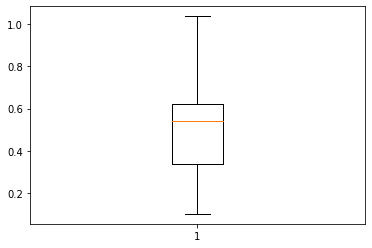

In [85]:
plt.figure()
plt.boxplot(random_search_repeat_results)
plt.show()

# 4. $\color{Blue}{
  \text{Simulated Annealing}
}
$

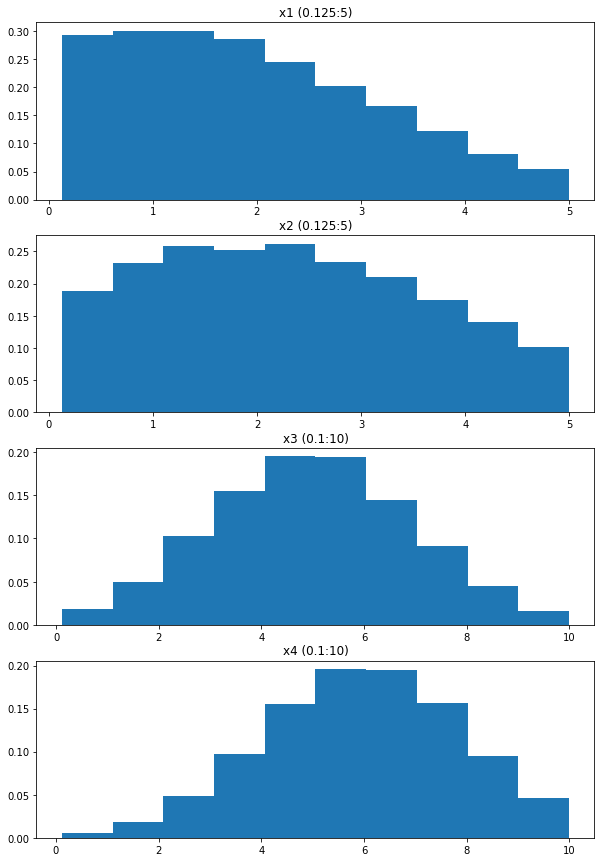

In [132]:
def generate_truncate_rvs(lb, ub, mu, sigma, n_samples = 1):
  '''
  lb : lower bound
  up : upper bound
  mu : mean
  sigma : standard deviation
  n_samples : number of samples
  '''
  a = (lb - mu)/sigma
  b = (ub - mu)/sigma
  d = len(a)

  r_normalised = truncnorm.rvs(a, b, size = (n_samples, d))
  r_scaled = (r_normalised * sigma) + mu
  return r_scaled


#################### unit testing #################
lb, ub = np.array([0.125, 0.125, 0.1, 0.1]), np.array([5, 5, 10, 10])
mu = np.array([1, 2, 5, 6])
sigma = np.array([2, 2, 2, 2])
n_samples = 20000
truncated_rvs = generate_truncate_rvs(lb, ub, mu, sigma, n_samples)

plt.figure(figsize = (10, 15))
ax = plt.subplot(4, 1, 1)
ax.set_title('x1 (0.125:5)')
ax.hist(truncated_rvs[:, 0], density = True)

ax = plt.subplot(4, 1, 2)
ax.set_title('x2 (0.125:5)')
ax.hist(truncated_rvs[:, 1], density = True)

ax = plt.subplot(4, 1, 3)
ax.set_title('x3 (0.1:10)')
ax.hist(truncated_rvs[:, 2], density = True)

ax = plt.subplot(4, 1, 4)
ax.set_title('x4 (0.1:10)')
ax.hist(truncated_rvs[:, 3], density = True)
plt.show()


In [86]:
def simulated_annealing(n_samples, lb, ub):
  '''
  no_samples : Number of samples
  Description : Implementation of simulated annealing
  '''
  x_best = np.random.uniform(low = lb, high = ub)
  y_best = f(x_best)

  x_c = x_best
  y_c = y_best

  # for k in range(n_samples):
  #   print('')

  return x_best, y_best

n_samples = 1000
lb, ub = [0.125, 0.125, 0.1, 0.1], [5, 5, 10, 10]
start = time.perf_counter()
simulated_annealing(n_samples, lb, ub)
[x_np_min, f_min] = simulated_annealing(n_samples, lb, ub)
end = time.perf_counter()

print(f'Optimal value : {x_np_min}')
print(f'Execution Time : {end} - {start}')


Optimal value : [3.29005078 4.75950872 3.13654698 9.5658209 ]
Execution Time : 6413.282845079 - 6413.282285622
